# Atividade de Busca

## Objetivo
Identificar as diferenças de implementação dos diversos tipos de busca
- Largura (Breadth First Search)
- Profundidade (Depth First Search)
- Custo Uniforme 
- Greedy Best First Search (Gulosa)
- A* (A-star)

Todo seu trabalho deve ficar no arquivo `projeto_busca.py`, cujo esqueleto já está fornecido.

A idéia é que você trabalhe somente na `projeto_busca.py` e use este *notebook* **somente para instruções e para testar o que fez**. Quando seu projeto estiver pronto o arquivo GIF gerado vai mostrar os passos de busca sendo executados.


## Atividades

### Pacotes do Python

Antes de começar, verifique se possui os seguintes pacotes:
- opencv-python
- pyyaml
- pillow
- sortedcontainers


### Tarefas
1. Implementar a função `calcula_custo(pos0, pos1)` que calcula a distância euclidiana de pos0 =(x0, y0) a pos1 = (x1, y1). Inicialmente ela retorna um valor constante, permitindo a execução das buscas em largura e em profundidade. 

2. Implementar a função `calcula_heurísica(pos0, pos1)` que calcula a distância de pos0 = (x0, y0) a pos1=(x1, y1). Pode escolher entre distância Manhattan, xadrez ou euclidiana. Inicialmente ela retorna um valor constante, permitindo a execução das buscas em largura e em profundidade. 

3. Implementar a função `custo_total(node)` que calcula o custo total usado para encontrar a ordem de análise dos nodes da fronteira. Depende do tipo de busca sendo realizada (custo unforme, gulosa ou A*).



In [2]:
%matplotlib inline

### Passo 1: Importando os módulos do Python

In [14]:
from __future__ import division, print_function

import sys
if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    import projeto_busca # Seu trabalho fica em projeto_busca. Você não deveria precisar editar este notebook
    importlib.reload(projeto_busca) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(sys)
    sys.setdefaultencoding("utf-8")
    input = raw_input
    import projeto_busca # Seu trabalho fica em projeto_busca. Você não deveria precisar editar este notebook
    reload(projeto_busca) # Para garantir que o Jupyter sempre relê seu trabalho

import os
import time
import cv2

from insper_graph import *


### Passo 2: Apresentação do problema

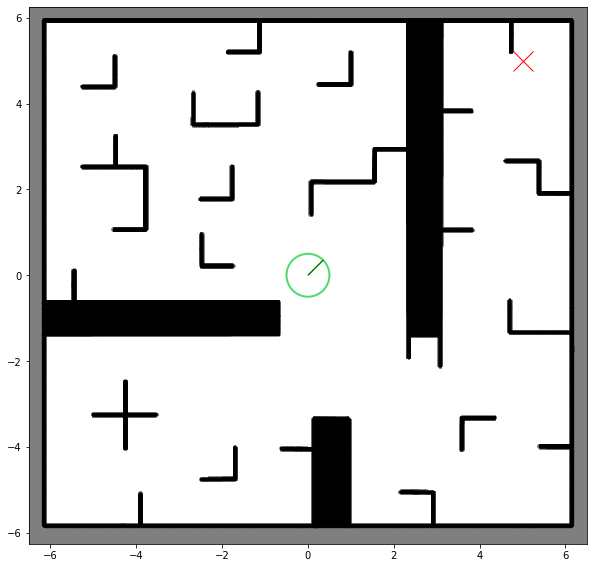

In [15]:
from projeto_busca import robot
from projeto_busca import destino
from projeto_busca import passo

# Você não deve se preocupar com o código abaixo - é só para gerar uma imagem que será mostrada mais adiante
from busca_insper import map
ax = nb_draw_map(map, robot=True, pose=robot, dest=destino)
plt.show()

### Passo 3: definição do tipo de busca

In [17]:
from projeto_busca import tipos_busca, set_numero_busca
print("Tipos de busca: ", ["%d : %s" % (x[0], x[1]) for x in enumerate(tipos_busca)] )
num = int(input("Qual é o número do tipo de busca? "))
set_numero_busca(num)
from projeto_busca import fronteira

Tipos de busca:  ['0 : largura', '1 : profundidade', '2 : custo uniforme', '3 : gulosa', '4 : A*']


### Passo 4: execução da busca

**ATENÇÃO**: Você não deveria precisar mexer no código abaixo

In [18]:
! rm anim/*.png 

'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [19]:

! del anim\*.png

N�o foi poss�vel encontrar c:\Users\anton\Projects\robotica\busca_insper\scripts\anim\*.png


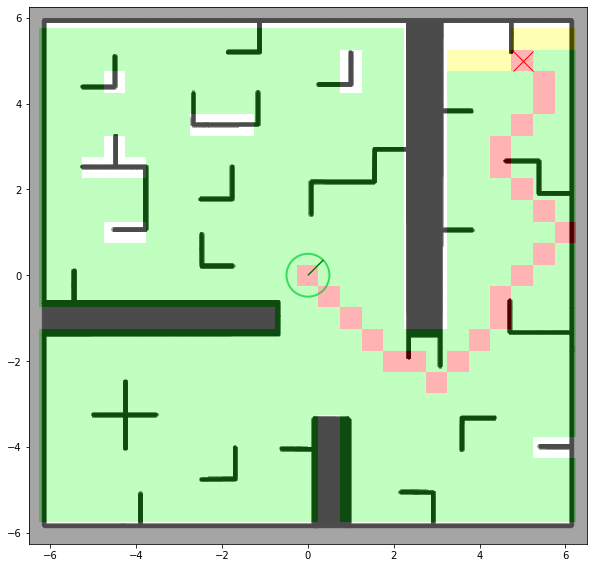

In [20]:
# Desliga o modo interativo, para nao aparecerem muitas imagens no meio por causa da animação
plt.ioff() 
# Número de frames a pular a cada print da busca
skip = 5
# Contador de frames
frames = 0

# ========== Elementos necessários à busca
from busca_insper import Node, Model
# ----- Modelo do problema sendo resolvido: 
# ......... proximas_posicoes(atual): retorna as posições possíveis a partir da posição atual
# ..........termino(posicao): indica se chegamos ao destino (True) ou não (False)
modelo = Model(map, passo, destino) 
# ----- Conjunto de posições já visitadas
visitados = set()
# ----- Sequencia de posições planejadas a serem percorridas
caminho = list()

# ========= Algoritmo de busca no mapa ==========
pos = (robot[0], robot[1]) # posição inicial
visitados.add(pos)
node = Node(pos, 0, None, modelo.heuristica(pos)) # Nó de busca

# At. 1: implementar a inserção do nó de busca na fronteira
projeto_busca.insere_fronteira(node) 
while len(caminho)==0 and len(fronteira) > 0 :
    # At. 2: implementar a remoção do nó de busca da fronteira
    node = projeto_busca.retira_fronteira()
    if not modelo.termino(node.posicao):
        # Determina as próximas possíveis posições do robô a partir da posição atual
        proximas_posicoes = modelo.sucessor(node.posicao)
        for pos in proximas_posicoes:
            if not pos in visitados:
                visitados.add(pos)
                # At. 3 implementar a função que calcula o custo de transição de estados (posições) 
                # At. 4 implementar a função que calcula o valor da função heurística do estado
                prox_node = Node(pos, modelo.custo(node.posicao, pos), node, modelo.heuristica(pos))
                projeto_busca.insere_fronteira(prox_node)
    else:
        # Recupera o caminho a partir dos nodes de busca
        while node is not None:
            caminho.append(node)
            node = node.pai
        caminho = caminho[::-1]
    
    # Mostra o mapa de busca
    if frames % skip == 0 or len(caminho) > 0:
        img = modelo.gera_imagem(fronteira, visitados, caminho)
        plt.close()
        ax = nb_draw_map(map, robot=True, pose=robot, dest=destino)
        nb_overlay(img, map, ax=ax, alpha = 0.3)
        plt.savefig("anim/anim%04d.png"%frames, bounds="tight")

        img = cv2.imread("anim/anim%04d.png"%frames)
        cv2.imshow("Estado da busca", img)
        cv2.waitKey(1)
    
    frames += 1

plt.ion()
cv2.waitKey()
cv2.destroyAllWindows()